# Customer Segmentation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option("display.max_columns",200) #show max 100 columns
pd.set_option("display.max_rows",200)
import warnings 
warnings.simplefilter('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('PBL5recommendationdata.csv', encoding = 'ISO-8859-1')

In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [5]:
miss = df.isnull().sum()
miss[miss>1]

Customers.company                 3467
Customers.status                  4093
Customers.mailing                 2080
Customers.reminders               4194
Customers.tax_exempt              4189
Customers.account_id              4191
Customers.sales_rep               4194
Customers.rewards                 4194
Customers.profile_id              4194
Customers.customer_type            423
Orders.company                    3466
Orders.reorder_id                 4112
Orders.external_source            3829
Orders.external_id                4189
Orders.sales_rep                  4194
Orders.tax                         457
Orders.shipping                    195
Orders.coupon_id                  3312
Orders.coupon_amount              3312
Orders.gift_id                    4194
Orders.gift_amount                4194
Orders.fee_name                   3967
Orders.fee_amount                 3916
Orders.discount_name              3912
Orders.discount_amount            3830
Orders.balance_due       

In [6]:
df.shape

(4194, 181)

In [7]:
df.columns

Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.company', 'Customers.create_date', 'Customers.status',
       'Customers.mailing', 'Customers.reminders', 'Customers.tax_exempt',
       'Customers.account_id',
       ...
       'Products.google_shopping_label', 'Products.product_option',
       'Products.size', 'Products.material', 'Products.arm_style',
       'Products.leg_style', 'Products.seat_size', 'Products.family_id',
       'Products.saved_status', 'Products.freight_cost'],
      dtype='object', length=181)

# RFM Analysis

#### RFM analysis is basically scoring our customers based on their Recency, Frequency and Monetary values.
#### because of this we just need following columns --> Customers.id, Orders.id, Orders.total, Orders.placed_date, Orders.payment_date

In [8]:
df1 = df[['Customers.id','Orders.id','Orders.total','Orders.placed_date','Orders.payment_date','Orders.updated_date']]

In [9]:
df1.head()

,Customers.id,Orders.id,Orders.total,Orders.placed_date,Orders.payment_date,Orders.updated_date
0,797,3758,64.29,1426019099,1.426019e+09,1.438868e+09
1,3,23,29.99,1386090455,1.386090e+09,1.440529e+09
2,3,9531,78.73,1449603652,1.449604e+09,1.450213e+09
3,4,29,29.55,1386780263,1.386780e+09,1.440529e+09
4,5,30,46.00,1386861599,1.386862e+09,1.440529e+09


In [10]:
df1.isnull().sum()

Customers.id            0
Orders.id               0
Orders.total            0
Orders.placed_date      0
Orders.payment_date    18
Orders.updated_date    23
dtype: int64

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customers.id         4194 non-null   int64  
 1   Orders.id            4194 non-null   int64  
 2   Orders.total         4194 non-null   float64
 3   Orders.placed_date   4194 non-null   int64  
 4   Orders.payment_date  4176 non-null   float64
 5   Orders.updated_date  4171 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 196.7 KB


In [12]:
df1['Orders.payment_date'] = pd.to_datetime(df1['Orders.payment_date'],unit='s')
df1['Orders.placed_date'] = pd.to_datetime(df1['Orders.placed_date'],unit='s')
df1['Orders.updated_date'] = pd.to_datetime(df1['Orders.updated_date'],unit='s')

In [13]:
df1.head()

,Customers.id,Orders.id,Orders.total,Orders.placed_date,Orders.payment_date,Orders.updated_date
0,797,3758,64.29,2015-03-10 20:24:59,2015-03-10 20:24:59,2015-08-06 13:40:10
1,3,23,29.99,2013-12-03 17:07:35,2013-12-03 17:07:35,2015-08-25 18:49:43
2,3,9531,78.73,2015-12-08 19:40:52,2015-12-08 19:40:52,2015-12-15 21:04:47
3,4,29,29.55,2013-12-11 16:44:23,2013-12-11 16:44:23,2015-08-25 18:49:43
4,5,30,46.00,2013-12-12 15:19:59,2013-12-12 15:19:59,2015-08-25 18:49:43


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Customers.id         4194 non-null   int64         
 1   Orders.id            4194 non-null   int64         
 2   Orders.total         4194 non-null   float64       
 3   Orders.placed_date   4194 non-null   datetime64[ns]
 4   Orders.payment_date  4176 non-null   datetime64[ns]
 5   Orders.updated_date  4171 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(2)
memory usage: 196.7 KB


In [15]:
df1.groupby('Customers.id')['Orders.placed_date'].max()

Customers.id
3      2015-12-08 19:40:52
4      2013-12-11 16:44:23
5      2014-09-10 15:40:55
7      2013-12-27 14:52:27
8      2014-01-09 21:33:36
               ...        
3730   2016-05-16 14:27:34
3732   2016-05-16 15:32:37
3733   2016-05-16 15:40:46
3735   2016-05-16 16:38:14
3736   2016-05-16 17:01:35
Name: Orders.placed_date, Length: 3054, dtype: datetime64[ns]

In [16]:
df1.groupby('Customers.id')['Orders.placed_date'].min()

Customers.id
3      2013-12-03 17:07:35
4      2013-12-11 16:44:23
5      2013-12-12 15:19:59
7      2013-12-27 14:52:27
8      2014-01-09 21:33:36
               ...        
3730   2016-05-16 14:27:34
3732   2016-05-16 15:32:37
3733   2016-05-16 15:40:46
3735   2016-05-16 16:38:14
3736   2016-05-16 17:01:35
Name: Orders.placed_date, Length: 3054, dtype: datetime64[ns]

In [41]:
df2 = df1.groupby('Customers.id').agg({'Orders.id': 'count', 'Orders.total' : 'sum', 'Orders.placed_date':'max'})

In [42]:
df2.head()

,Orders.id,Orders.total,Orders.placed_date
Customers.id,,,
3,2,108.72,2015-12-08 19:40:52
4,1,29.55,2013-12-11 16:44:23
5,3,124.99,2014-09-10 15:40:55
7,1,49.14,2013-12-27 14:52:27
8,1,69.70,2014-01-09 21:33:36


In [43]:
import datetime as dt
today = dt.datetime(2022,11,7)

In [44]:
df2['Recency']=( today -df2['Orders.placed_date']).dt.days

In [45]:
df2.head()

,Orders.id,Orders.total,Orders.placed_date,Recency
Customers.id,,,,
3,2,108.72,2015-12-08 19:40:52,2525
4,1,29.55,2013-12-11 16:44:23,3252
5,3,124.99,2014-09-10 15:40:55,2979
7,1,49.14,2013-12-27 14:52:27,3236
8,1,69.70,2014-01-09 21:33:36,3223


In [46]:
df2.columns = ['frequency','monetary','date','receny']

In [47]:
del df2['date']

In [48]:
df2.head()

,frequency,monetary,receny
Customers.id,,,
3,2,108.72,2525
4,1,29.55,3252
5,3,124.99,2979
7,1,49.14,3236
8,1,69.70,3223


In [49]:
model = KMeans(n_clusters=4)
model = model.fit(df2)
tahmin = model.predict(df2)

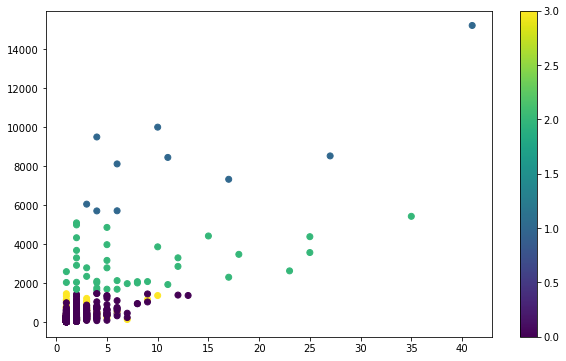

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(df2.frequency,df2.monetary,c = tahmin)
plt.colorbar();

In [51]:
allscore=[]
allclusters=[]
uzakliklar=[]

def clust(kactane):
    
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(df2)
        tahmin=model.predict(df2)
        score=silhouette_score(df2,tahmin)
        uzaklik=model.inertia_
        print("Cluster ",i," score ",score)
        allscore.append(score)
        allclusters.append(i)
        uzakliklar.append(uzaklik)
clust(15)

Cluster  2  score  0.9354778775404075
Cluster  3  score  0.8935731157082295
Cluster  4  score  0.521285520010899
Cluster  5  score  0.5583732700613632
Cluster  6  score  0.5583957197647287
Cluster  7  score  0.5683339814649596
Cluster  8  score  0.49988677556676403
Cluster  9  score  0.5100675688856179
Cluster  10  score  0.5106486686995232
Cluster  11  score  0.4791733427890627
Cluster  12  score  0.4846433048566121
Cluster  13  score  0.4724862607710172
Cluster  14  score  0.4590441987181211
Cluster  15  score  0.4664322692390678
Cluster  16  score  0.41431463344957853


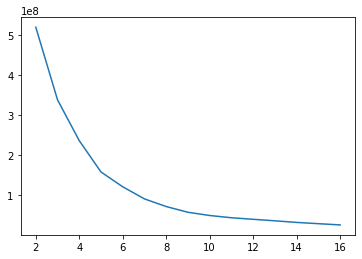

In [52]:
plt.plot(allclusters,uzakliklar);